# Imports

In [35]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
import json
import os
from tqdm.notebook import tqdm,tnrange
import string
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/sandeep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sandeep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Inverted Index

In [32]:

class InvertedIndex():
	def __init__(self):
		self.db={}

	def __str__(self):
		return "Keys:"+str(len(list(self.db.keys())))
	
	def stripSpecialChar(self,text):
		return ''.join(ch for ch in text if ch.isalnum() and not ch.isdigit() and ch not in string.punctuation)

	def preProcess(self,text):
		stemmer = SnowballStemmer("english")
		stopWords = set(stopwords.words('english'))

		text = text.lower()
		text_tokens = word_tokenize(text)
		stemmedWords = list(set([stemmer.stem(word)    for word in text_tokens]))
		
		validTokens = list(set(stemmedWords) - set(stopWords))
		validTokens = [self.stripSpecialChar(x) for x in validTokens]
		validTokens = set([x for x in validTokens if len(x) > 1])
		return validTokens

	def indexFile(self,file,fileId):
		tokens = self.preProcess(file)
		for i in tokens:
			if i in self.db:
				self.db[i].append(fileId)
			else:
				self.db[i] = [fileId]

	def generateWordcloud(self):
		frequencyDict = {}
		for key in self.db:
			frequencyDict[key] = len(self.db[key])
		wordcloud = WordCloud().generate_from_frequencies(frequencyDict)
		plt.imshow(wordcloud, interpolation="bilinear")
		plt.axis("off")

	def save(self):
		json.dump(self.db, open("output.json", "w"))


# Creating Index

In [33]:
allFiles = os.walk("stories")
filePaths = []
for i in allFiles:
	for j in i[2]:
		filePath = i[0] + "/" + j
		filePaths.append(filePath)

json.dump(filePaths, open("mapping.json", "w"))

index = InvertedIndex()

for i,filePath in enumerate(tqdm(filePaths)):
    try:
        file = open(filePath, encoding="utf8")
        read = file.read().replace('\n', ' ')    
    except Exception as e:
        file = open(filePath, encoding="unicode_escape")
        read = file.read().replace('\n', ' ')
    file.close()
    index.indexFile(read, i)
    index.save()


  0%|          | 0/467 [00:00<?, ?it/s]

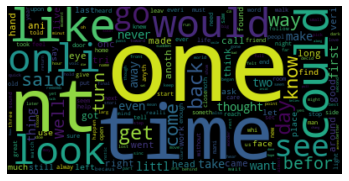

In [34]:
index.generateWordcloud()